# Линейные модели

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets

# Boston dataset (регрессия)

In [3]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
print(boston.DESCR[100:1300])

   :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by t

In [5]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


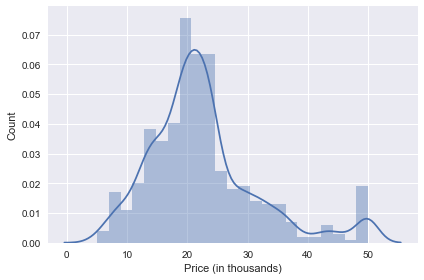

In [6]:
plt.figure(figsize=(6, 4))
sns.distplot(boston.target)

plt.xlabel('Price (in thousands)')
plt.ylabel('Count')
plt.tight_layout()

In [8]:
from sklearn.linear_model import LinearRegression


linear_regression = LinearRegression()
model = linear_regression.fit(boston.data, boston.target)

In [9]:
feature_weight_df = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
feature_weight_df.columns = ['Feature', 'Weight']
print(feature_weight_df)

    Feature     Weight
0      CRIM  -0.107171
1        ZN   0.046395
2     INDUS   0.020860
3      CHAS   2.688561
4       NOX -17.795759
5        RM   3.804752
6       AGE   0.000751
7       DIS  -1.475759
8       RAD   0.305655
9       TAX  -0.012329
10  PTRATIO  -0.953464
11        B   0.009393
12    LSTAT  -0.525467


In [10]:
import operator

first_predicted = sum(map(
    lambda pair: operator.mul(*pair),
    zip(model.coef_, boston.data[0])
))

print(first_predicted)

-6.48289058802


In [11]:
print(model.intercept_)

36.4911032804


In [12]:
first_predicted += model.intercept_
print(first_predicted)

30.0082126923


In [13]:
predicted = model.predict(boston.data)

print(predicted[:10])

[ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232
  25.25940048  23.00433994  19.5347558   11.51696539  18.91981483]


In [14]:
predictions_ground_truth_df = pd.DataFrame(list(zip(predicted, boston.target)))
predictions_ground_truth_df.columns = ['Prediction', 'Ground truth']
predictions_ground_truth_df.head()

,Prediction,Ground truth
0,30.008213,24.0
1,25.029861,21.6
2,30.570232,34.7
3,28.608141,33.4
4,27.942882,36.2


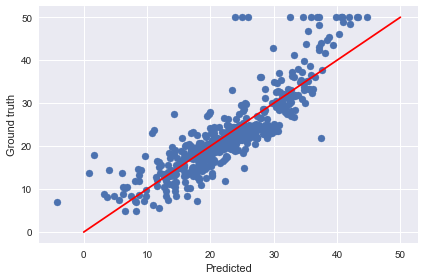

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(predicted, boston.target)
plt.xlabel('Predicted')
plt.ylabel('Ground truth')

plt.plot([0, 50], [0, 50], color="red")
plt.tight_layout()

# Breast Cancer dataset (классификация)

In [16]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [17]:
print(cancer.DESCR[:760])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

 


In [18]:
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = cancer.feature_names
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


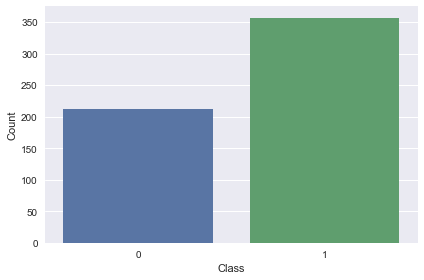

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(cancer.target)

plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()

In [20]:
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression()
model = logistic_regression.fit(cancer.data, cancer.target)

print(model.coef_)

[[  1.96224072e+00   1.09996380e-01  -8.27950258e-02   8.90434616e-04
   -1.07831304e-01  -3.68699776e-01  -5.48008661e-01  -2.60109539e-01
   -1.54332590e-01  -2.37021683e-02   3.48932284e-02   1.06324234e+00
    2.32469070e-01  -1.07502636e-01  -1.09504757e-02  -3.92130363e-02
   -7.80479100e-02  -3.19221320e-02  -3.25726066e-02  -1.43621353e-03
    1.65577427e+00  -3.28029900e-01  -1.56641955e-01  -2.67434115e-02
   -1.97128545e-01  -1.08262267e+00  -1.41356630e+00  -4.99043247e-01
   -4.77765523e-01  -1.06934792e-01]]


In [21]:
prediction = model.predict(cancer.data)
print(prediction[:10])

[0 0 0 1 0 0 0 0 0 0]


In [22]:
prediction = model.predict_proba(cancer.data)
print(prediction[:10])

[[  1.00000000e+00   6.14202759e-16]
 [  9.99999984e-01   1.61395481e-08]
 [  9.99999965e-01   3.54000645e-08]
 [  3.47167677e-01   6.52832323e-01]
 [  9.99991421e-01   8.57852550e-06]
 [  8.05752201e-01   1.94247799e-01]
 [  9.99999332e-01   6.68151079e-07]
 [  9.82454712e-01   1.75452883e-02]
 [  9.07823146e-01   9.21768540e-02]
 [  9.96003979e-01   3.99602074e-03]]


In [23]:
print('Accuracy: {}'.format(model.score(cancer.data, cancer.target)))

Accuracy: 0.9578207381370826


In [24]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}